In [426]:
import json
import os
from matplotlib import pyplot as plt
from scipy.stats import pearsonr, spearmanr
from collections import defaultdict, Counter
import networkx as nx
import pandas as pd

Correlation between number of training cases and class F1

In [370]:
metric = {}

In [387]:
with open("/home/workboots/Results/advocate_recommendation/test_f1_sorted/xlnet_vanilla.json", 'r') as f:
    metrics = json.load(f)

In [388]:
metric["xlnet_vanilla"] = metrics["class_f1"]

In [409]:
metric

{'area_sim': {'ArtaTranaPanda': 0.9523809523809523,
  'ShivChopra': 0.9473684210526316,
  'ManojSharma': 0.888888888888889,
  'SatyenSethi': 0.8571428571428572,
  'AjayKalra': 0.7368421052631579,
  'AjayKumar': 0.6923076923076923,
  'RMishra': 0.6666666666666666,
  'JyotiTyagi': 0.6461538461538462,
  'PramodKumarDubey': 0.6428571428571429,
  'PiyushKaushik': 0.6428571428571429,
  'YeshuJain': 0.6349206349206349,
  'IzharAhmad': 0.5454545454545454,
  'ManmeetArora': 0.5454545454545454,
  'SunilGoel': 0.5454545454545454,
  'DaneshRelan': 0.5217391304347827,
  'MSingh': 0.5,
  'AtulKumar': 0.48648648648648646,
  'VijayAgarwal': 0.4848484848484849,
  'SameerNadwani': 0.4761904761904762,
  'NareshKaushik': 0.4736842105263157,
  'VinodDiwakar': 0.46153846153846156,
  'SGanesh': 0.4615384615384615,
  'SanjayPoddar': 0.4556962025316455,
  'AbishekKumar': 0.4444444444444445,
  'NarenderMann': 0.4210526315789474,
  'SatishAggarwal': 0.4,
  'BVNiren': 0.4,
  'VikramSaini': 0.4,
  'RebeccaJohn': 0

In [390]:
advs = metric["longformer"].keys()

In [395]:
ordered_scores = defaultdict(lambda: list())

In [396]:
for adv in advs:
    for m in metric:
        ordered_scores[m].append(metric[m][adv])

In [332]:
with open("/home/workboots/Datasets/DHC/variations/new/var_4/adv_info/not_dropped/train/adv_case_num.json", 'r') as f:
    adv_case_num = json.load(f)

In [333]:
with open("/home/workboots/Results/advocate_recommendation/analysis/adv_scumble.json", 'r') as f:
    adv_scumble = json.load(f)

In [334]:
adv_scumble = adv_scumble["per_target"]

In [335]:
with open("/home/workboots/Datasets/DHC/variations/new/var_4/adv_info/not_dropped/train/adv_cases.json", 'r') as f:
    adv_cases = json.load(f)

In [590]:
with open("/home/workboots/Datasets/DHC/variations/new/var_4/adv_info/not_dropped/train/adv_area_act_chapter_section_info.json", 'r') as f:
    adv_areas = json.load(f)

In [364]:
adv_areas = {
    k: v["areas"].keys()
    for k, v in adv_areas.items()}

In [611]:
with open("/home/workboots/Datasets/DHC/variations/new/var_4/area_act_chapter_section_info/dropped/train/area_case_info.json", 'r') as f:
    area_cases = json.load(f)

In [336]:
adv_case_num = {
    k: v
    for k, v in sorted(adv_case_num.items(),
                       key=lambda x: x[1],
                       reverse=True)}

In [337]:
class_f1 = {
    k: v
    for k, v in sorted(metrics["class_f1"].items(),
                       key=lambda x: x[1])}

In [424]:
co_occur_num = defaultdict(int)
co_occur_dict = defaultdict(lambda: dict())
for adv_1, cases_1 in adv_cases.items():
    for adv_2, cases_2 in adv_cases.items():
        if adv_1 == adv_2:
            continue
        intersect = len(set(cases_1).intersection(set(cases_2)))
        co_occur_dict[adv_1][adv_2] = intersect
        if intersect != 0:
            co_occur_num[adv_1] += 1

In [468]:
f1 = []
num = []
scumble = []
co_occur = []
deg = []
for k in adv_case_num:
    deg.append(degree[k])
    co_occur.append(co_occur_num[k])
    scumble.append(adv_scumble[k])
    f1.append(class_f1[k])
    num.append(adv_case_num[k])

In [340]:
corr, x = pearsonr(f1, num)

In [341]:
corr

0.11269755604700937

In [342]:
x

0.04888277274069652

In [420]:
corr_1, x_1 = pearsonr(scumble, )

In [421]:
corr_1

-0.10208383758562461

In [418]:
corr_2, x = pearsonr(co_occur, num)

In [419]:
corr_2

0.5793663391034967

In [469]:
deg_corr, _ = pearsonr(deg, f1)

In [470]:
deg_corr

-0.12144114962829775

In [347]:
%matplotlib inline

Advocates with greater than 0.75 F1

In [348]:
high_f1_adv = [k for k, v in class_f1.items() if v >= 0.75]

In [349]:
high_f1_adv_train_num = [adv_case_num[k] for k in high_f1_adv]

In [350]:
high_f1_adv_train_num

[39, 37, 45, 40]

In [351]:
sum(high_f1_adv_train_num) * 1./len(high_f1_adv_train_num)

40.25

In [352]:
model_advs["area_sim"] = high_f1_adv

In [353]:
model_advs

{'longformer': ['SMuralidhar',
  'SatyenSethi',
  'ManojSharma',
  'ShivChopra',
  'ArtaTranaPanda'],
 'databank': ['AjayKalra', 'ManojSharma', 'ShivChopra'],
 'concat': ['AjayKumar',
  'AjayKalra',
  'ManojSharma',
  'SatyenSethi',
  'ShivChopra',
  'ArtaTranaPanda'],
 'simple_mtl': ['AjayKumar',
  'AjayKalra',
  'ManojSharma',
  'SatyenSethi',
  'ShivChopra',
  'ArtaTranaPanda'],
 'roberta_kmm': ['AjayKalra', 'ManojSharma', 'ShivChopra'],
 'xlnet_vanilla': ['AjayKumar',
  'AjayKalra',
  'ManojSharma',
  'SatyenSethi',
  'ShivChopra',
  'ArtaTranaPanda'],
 'area_sim': ['SatyenSethi', 'ManojSharma', 'ShivChopra', 'ArtaTranaPanda']}

In [259]:
del model_advs["simple_mtll"]

In [357]:
set.intersection(*[a for a in list(map(lambda x: set(x), model_advs.values()))])

{'ManojSharma', 'ShivChopra'}

In [585]:
best_f1 = set.union(*[a for a in list(map(lambda x: set(x), model_advs.values()))])

In [586]:
best_f1

{'AjayKalra',
 'AjayKumar',
 'ArtaTranaPanda',
 'ManojSharma',
 'SMuralidhar',
 'SatyenSethi',
 'ShivChopra'}

In [361]:
counts = Counter([a for v in model_advs.values() for a in v])

In [367]:
counts

Counter({'SMuralidhar': 1,
         'SatyenSethi': 5,
         'ManojSharma': 7,
         'ShivChopra': 7,
         'ArtaTranaPanda': 5,
         'AjayKalra': 5,
         'AjayKumar': 3})

In [365]:
areas = [adv_areas[k] for k in dict(counts).keys()]

In [366]:
areas 

[dict_keys(['CRIMINAL LAW', 'CONSTITUTIONAL LAW', 'CIVIL LAW', 'NATIONAL SECURITY LAW', 'CONTRACT LAW', 'JUDICIARY AND COURTS LAW', 'GOVERNMENT LAW', 'TRANSPORTATION LAW', 'COMPANY OR BUSINESS OR CORPORATE LAW', 'PROPERTY LAW', 'HUMAN RIGHTS LAW', 'ENERGY LAW', 'INTELLECTUAL PROPERTY LAW', 'TAX LAW', 'ADMINISTRATIVE LAW', 'IMMIGRATION LAW', 'COMPETITION LAW', 'INTERNATIONAL LAW', 'BANKING AND FINANCE LAW', 'CYBER LAW', 'ELECTION LAW', 'TRADE LAW']),
 dict_keys(['CONSTITUTIONAL LAW', 'INTERNATIONAL LAW', 'BANKING AND FINANCE LAW', 'PROPERTY LAW', 'CONTRACT LAW', 'CRIMINAL LAW', 'CIVIL LAW', 'COMPANY OR BUSINESS OR CORPORATE LAW', 'TAX LAW']),
 dict_keys(['CRIMINAL LAW', 'BANKING AND FINANCE LAW', 'CONSTITUTIONAL LAW', 'INTELLECTUAL PROPERTY LAW', 'JUDICIARY AND COURTS LAW', 'CIVIL LAW', 'GOVERNMENT LAW', 'CONTRACT LAW', 'MOTOR VEHICLES LAW', 'NATIONAL SECURITY LAW', 'PROPERTY LAW']),
 dict_keys(['CRIMINAL LAW', 'BANKING AND FINANCE LAW', 'CONSTITUTIONAL LAW', 'JUDICIARY AND COURTS LAW',

In [400]:
s = []
for m_1, vals_1 in ordered_scores.items():
    for m_2, vals_2 in ordered_scores.items():
        if m_1 == m_2:
            continue
        c, x = spearmanr(vals_1, vals_2)
        s.append(c)

In [402]:
sum(s) * 1./len(s)

0.7998618752418425

In [407]:
low_f1_adv = {
    k: [adv for adv, val in v.items() if val == 0.0]
    for k, v in metric.items()}

In [411]:
[len(v) for v in low_f1_adv.values()]

[100, 69, 92, 84, 125, 66, 81]

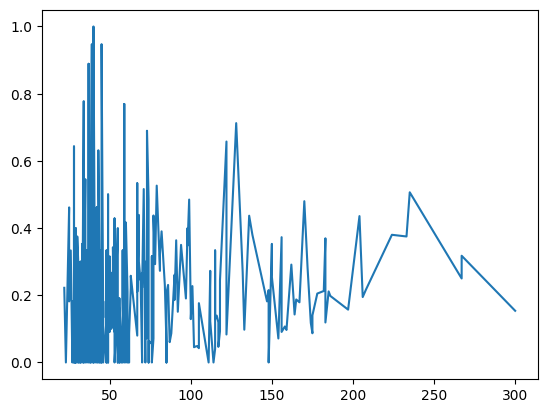

In [164]:
plt.plot(num, f1)

| Method | Pearson |
|--------|---------|
| Longformer | 0.1924 |
| MTL | 0.1714 |
| Concat | 0.1871 |
| RoBERTa (KMM) | 0.1599 |
| Databank | 0.2097 |
| Area Sim | 0.1127 |
| XLNet Vanilla | 0.1320 |


| Method | # of training cases |
|--------|---------|
| Longformer | 58.6 |
| MTL | 39.0 |
| Concat | 42.34 |
| RoBERTa (KMM) | 38.67 |
| Databank | 38.67 |
| Area Sim | 40.25 |
| XLNet Vanilla | 42.34 |

In [429]:
co_occur_dict = dict(co_occur_dict)

In [432]:
df = pd.DataFrame.from_dict(co_occur_dict)

In [435]:
df.fillna(0.0)

,WazeAliNoor,PragTripathi,AkshayMakhija,KirtimanSingh,AbhishekSingh,KamalSawhney,PavanKumar,NirajKishanKaul,SGupta,NavneetGoyal,...,RaviNayak,AjayKalra,AshokAgarwal,AmitSingh,RAIyer,RahulSharma,MukulTalwar,SunilKumarJha,AbhinavVasisht,TusharMehta
PragTripathi,1.0,0.0,3.0,1.0,5.0,1.0,0.0,6.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
AkshayMakhija,3.0,3.0,0.0,3.0,2.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KirtimanSingh,46.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
AbhishekSingh,2.0,5.0,2.0,2.0,0.0,0.0,0.0,4.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0
KamalSawhney,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MukulTalwar,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
SunilKumarJha,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AbhinavVasisht,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TusharMehta,1.0,1.0,0.0,1.0,5.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [456]:
G = nx.from_pandas_adjacency(df, create_using=nx.DiGraph)

In [457]:
G

In [588]:
for k in best_f1:
    print(k, G.degree(k))

ShivChopra 42
ArtaTranaPanda 32
SMuralidhar 260
AjayKalra 114
AjayKumar 86
ManojSharma 54
SatyenSethi 44


In [592]:
for k in best_f1:
    print(k, adv_areas[k]["areas"])

ShivChopra {'CRIMINAL LAW': 42, 'BANKING AND FINANCE LAW': 28, 'CONSTITUTIONAL LAW': 30, 'JUDICIARY AND COURTS LAW': 1, 'NATIONAL SECURITY LAW': 2, 'CIVIL LAW': 3, 'MEDIA LAW': 2, 'CONTRACT LAW': 1}
ArtaTranaPanda {'INTERNATIONAL LAW': 3, 'TAX LAW': 1}
SMuralidhar {'CRIMINAL LAW': 72, 'CONSTITUTIONAL LAW': 50, 'CIVIL LAW': 25, 'NATIONAL SECURITY LAW': 11, 'CONTRACT LAW': 1, 'JUDICIARY AND COURTS LAW': 5, 'GOVERNMENT LAW': 6, 'TRANSPORTATION LAW': 6, 'COMPANY OR BUSINESS OR CORPORATE LAW': 1, 'PROPERTY LAW': 7, 'HUMAN RIGHTS LAW': 6, 'ENERGY LAW': 1, 'INTELLECTUAL PROPERTY LAW': 2, 'TAX LAW': 5, 'ADMINISTRATIVE LAW': 1, 'IMMIGRATION LAW': 1, 'COMPETITION LAW': 2, 'INTERNATIONAL LAW': 1, 'BANKING AND FINANCE LAW': 1, 'CYBER LAW': 1, 'ELECTION LAW': 2, 'TRADE LAW': 1}
AjayKalra {'CRIMINAL LAW': 15, 'GOVERNMENT LAW': 1, 'CONSTITUTIONAL LAW': 12, 'NATIONAL SECURITY LAW': 1, 'INTELLECTUAL PROPERTY LAW': 4, 'CIVIL LAW': 1, 'TRANSPORTATION LAW': 1, 'BANKING AND FINANCE LAW': 7, 'TAX LAW': 1, '

In [466]:
degree = {}
for k in G._node.keys():
    degree[k] = G.degree(k)

In [593]:
degree

{'PragTripathi': 234,
 'AkshayMakhija': 190,
 'KirtimanSingh': 186,
 'AbhishekSingh': 152,
 'KamalSawhney': 64,
 'PavanKumar': 28,
 'NirajKishanKaul': 232,
 'SGupta': 140,
 'NavneetGoyal': 24,
 'RaviGupta': 190,
 'RajivBansal': 192,
 'PankajSeth': 50,
 'AmitMahjan': 210,
 'DayanKrishan': 272,
 'AbhshekGhai': 52,
 'SanjeevNarul': 198,
 'DaneshRelan': 166,
 'NanditaRao': 132,
 'SSharma': 192,
 'AmitGupta': 236,
 'AnkitJain': 142,
 'KusumDhalla': 114,
 'SandeepBajaj': 100,
 'OPManni': 36,
 'SangeetaChandra': 108,
 'DeepakAnad': 88,
 'ArtaTranaPanda': 32,
 'ASChanhiok': 290,
 'RiteshKumar': 106,
 'AmitGeorge': 32,
 'GauravSharma': 96,
 'ArvindNigam': 266,
 'OPSaxena': 108,
 'KewalSinghAhuja': 102,
 'TanmyaMehta': 104,
 'RajeshKumar': 202,
 'HarishMalhotra': 180,
 'AKSoni': 44,
 'MukulRohtagi': 176,
 'RajivNayar': 244,
 'RichaKapoor': 148,
 'PawanSharma': 124,
 'SahilaLamba': 180,
 'SidharthAgarwal': 140,
 'RamanKapur': 124,
 'JyotiSingh': 184,
 'AnkurChibber': 190,
 'RakhiDubey': 84,
 'Fiz

In [594]:
(degree.values())

20

In [472]:
high_train_adv = [k for k, v in adv_cases.items() if len(v) > 150]

In [473]:
high_train_adv

['RaviGupta',
 'RajivBansal',
 'PankajSeth',
 'AmitGupta',
 'KusumDhalla',
 'ArvindNigam',
 'HarishMalhotra',
 'AKSoni',
 'RajivNayar',
 'RichaKapoor',
 'SahilaLamba',
 'ChetanSharma',
 'SanjivSabharwal',
 'JayantMehta',
 'SanjayPoddar',
 'MohitMathur',
 'SanjayJai',
 'AjayVohra',
 'KavitaJha',
 'ArunBirbal',
 'AshaTiwari',
 'RKSaini',
 'SandipSethi',
 'AmitSibal',
 'MeenakshiChauhan',
 'RameshGupta',
 'SudhirNandajog',
 'SachinDutta',
 'AvnishAhlwat',
 'RajatKatyal',
 'ManinderAcharya']

In [496]:
high_adv_deg = []
high_adv_f1 = []
for k in high_train_adv:
    high_adv_deg.append(degree[k])
    high_adv_f1.append(metric["xlnet_vanilla"][k])

In [497]:
corr, _ = pearsonr(high_adv_f1, high_adv_deg)

In [498]:
corr

-0.7443582353553214

| Method | Correlation |
|--------|---------|
| Longformer | -0.6694 |
| MTL | -0.6359 |
| Concat | -0.6914 |
| RoBERTa (KMM) | -0.7553 |
| Databank | -0.5287 |
| Area Sim | -0.5500 |
| XLNet Vanilla | -0.7444 |

In [499]:
low_train_adv = [k for k, v in adv_cases.items() if len(v) < 150]

In [536]:
low_adv_deg = []
low_adv_f1 = []
for k in low_train_adv:
    low_adv_deg.append(degree[k])
    low_adv_f1.append(metric["longformer"][k])

In [537]:
corr, _ = pearsonr(low_adv_f1, low_adv_deg)

In [538]:
corr

-0.1142870766252739

In [540]:
(-0.1310 + -0.1883 + -0.0168 + -0.1766 + -0.1139 + -0.1446 + -0.1143) * 1./7

-0.1265

### Area-Based Prediction

In [567]:
with open("/home/workboots/Results/advocate_recommendation/analysis/hard_marginal_area_sim.json", 'r') as f:
    metrics = json.load(f)

In [543]:
score = {}

In [568]:
score["area_sim"] = metrics

In [581]:
with open("/home/workboots/Datasets/DHC/variations/new/var_4/area_act_chapter_section_info/not_dropped/train/area_case_num.json", 'r') as f:
    area_case_num = json.load(f)

In [569]:
score.keys()

dict_keys(['longformer', 'concat', 'databank', 'roberta_kmm', 'xlnet_vanilla', 'area_sim', 'simple_mtl'])

In [574]:
top_4 = [list(v.keys())[:4] for k, v in score.items()]

In [575]:
top_4

[['MARITIME LAW',
  'MINING, PETROLEUM AND NATURAL RESOURCES LAW',
  'MEDIA LAW',
  'CONSUMER LAW'],
 ['MINING, PETROLEUM AND NATURAL RESOURCES LAW',
  'CONSUMER LAW',
  'MEDIA LAW',
  'TELECOMMUNICATION LAW'],
 ['MEDIA LAW', 'CONSUMER LAW', 'TELECOMMUNICATION LAW', 'IMMIGRATION LAW'],
 ['MINING, PETROLEUM AND NATURAL RESOURCES LAW',
  'MEDIA LAW',
  'CONSUMER LAW',
  'TELECOMMUNICATION LAW'],
 ['MINING, PETROLEUM AND NATURAL RESOURCES LAW',
  'MEDIA LAW',
  'CONSUMER LAW',
  'TELECOMMUNICATION LAW'],
 ['MEDIA LAW', 'CONSUMER LAW', 'IMMIGRATION LAW', 'TELECOMMUNICATION LAW'],
 ['MEDIA LAW', 'CONSUMER LAW', 'TELECOMMUNICATION LAW', 'IMMIGRATION LAW']]

In [578]:
counts = Counter([v for k in top_4 for v in k])

In [579]:
counts

Counter({'MARITIME LAW': 1,
         'MINING, PETROLEUM AND NATURAL RESOURCES LAW': 4,
         'MEDIA LAW': 7,
         'CONSUMER LAW': 7,
         'TELECOMMUNICATION LAW': 6,
         'IMMIGRATION LAW': 3})

In [572]:
score

{'longformer': {'MARITIME LAW': {'class_prec': {'SAggarwal': 1.0},
   'class_rec': {'SAggarwal': 1.0},
   'class_f1': {'SAggarwal': 1.0},
   'class_sup': {'SAggarwal': 1.0},
   'macro_prec': 1.0,
   'macro_rec': 1.0,
   'macro_f1': 1.0,
   'macro_sup': None,
   'micro_prec': 1.0,
   'micro_rec': 1.0,
   'micro_f1': 1.0,
   'micro_sup': None},
  'MINING, PETROLEUM AND NATURAL RESOURCES LAW': {'class_prec': {'KirtimanSingh': 1.0,
    'AbhishekSingh': 1.0,
    'DhruvMehta': 0.0,
    'WazeAliNoor': 1.0,
    'PragTripathi': 0.5,
    'AkshayMakhija': 1.0},
   'class_rec': {'KirtimanSingh': 1.0,
    'AbhishekSingh': 1.0,
    'DhruvMehta': 0.0,
    'WazeAliNoor': 1.0,
    'PragTripathi': 1.0,
    'AkshayMakhija': 1.0},
   'class_f1': {'KirtimanSingh': 1.0,
    'AbhishekSingh': 1.0,
    'DhruvMehta': 0.0,
    'WazeAliNoor': 1.0,
    'PragTripathi': 0.6666666666666666,
    'AkshayMakhija': 1.0},
   'class_sup': {'KirtimanSingh': 1.0,
    'AbhishekSingh': 1.0,
    'DhruvMehta': 1.0,
    'WazeAliN

In [582]:
corr = {}
for s in score:
    f1 = []
    nums = []
    for a in score[s]:
        f1.append(score[s][a]["macro_f1"])
        nums.append(area_case_num[a])
    corr[s], _ = pearsonr(f1, nums)

In [583]:
corr

{'longformer': -0.11542548701902819,
 'concat': -0.08689714234495392,
 'databank': 0.02291132283073765,
 'roberta_kmm': -0.09125546266608583,
 'xlnet_vanilla': -0.019510390285982893,
 'area_sim': 0.02339036267160008,
 'simple_mtl': 0.004417812661708964}

In [602]:
area_co_occur = defaultdict(lambda: dict())

In [603]:
for a_1, c_1 in area_cases.items():
    for a_2, c_2 in area_cases.items():
        if a_1 == a_2:
            continue
        intersect = len(set(c_1).intersection(set(c_2)))
        area_co_occur[a_1][a_2] = intersect

In [604]:
df_area = pd.DataFrame.from_dict(area_co_occur)
df_area.fillna(0.0)

,JUDICIARY AND COURTS LAW,CRIMINAL LAW,CONSTITUTIONAL LAW,TAX LAW,ADMINISTRATIVE LAW,CIVIL LAW,BANKING AND FINANCE LAW,COMPANY OR BUSINESS OR CORPORATE LAW,NATIONAL SECURITY LAW,FAMILY LAW,...,ESTATE PLANNING (WILLS AND TRUSTS) LAW,ENVIRONMENT LAW,COMPETITION LAW,MEDICAL AND HEALTHCARE LAW,AVIATION LAW,RTI LAW,CONSUMER LAW,ENERGY LAW,AGRICULTURE LAW,MEDIA LAW
CRIMINAL LAW,143.0,0.0,566.0,69.0,31.0,274.0,162.0,79.0,362.0,96.0,...,1.0,2.0,9.0,5.0,0.0,5.0,2.0,11.0,6.0,11.0
CONSTITUTIONAL LAW,211.0,566.0,0.0,83.0,48.0,355.0,81.0,86.0,68.0,29.0,...,3.0,12.0,14.0,23.0,7.0,16.0,4.0,17.0,6.0,9.0
TAX LAW,27.0,69.0,83.0,0.0,19.0,24.0,13.0,12.0,7.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
ADMINISTRATIVE LAW,57.0,31.0,48.0,19.0,0.0,10.0,2.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
CIVIL LAW,431.0,274.0,355.0,24.0,10.0,0.0,46.0,92.0,16.0,44.0,...,7.0,2.0,9.0,16.0,2.0,4.0,8.0,9.0,5.0,11.0
BANKING AND FINANCE LAW,42.0,162.0,81.0,13.0,2.0,46.0,0.0,35.0,2.0,2.0,...,0.0,0.0,4.0,0.0,0.0,2.0,2.0,3.0,2.0,1.0
COMPANY OR BUSINESS OR CORPORATE LAW,64.0,79.0,86.0,12.0,1.0,92.0,35.0,0.0,6.0,3.0,...,2.0,2.0,4.0,0.0,1.0,2.0,1.0,5.0,1.0,0.0
NATIONAL SECURITY LAW,3.0,362.0,68.0,7.0,0.0,16.0,2.0,6.0,0.0,3.0,...,0.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0
FAMILY LAW,29.0,96.0,29.0,1.0,0.0,44.0,2.0,3.0,3.0,0.0,...,3.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0
INTELLECTUAL PROPERTY LAW,57.0,71.0,73.0,5.0,2.0,168.0,9.0,29.0,3.0,11.0,...,0.0,0.0,3.0,0.0,0.0,2.0,2.0,1.0,2.0,0.0


In [612]:
G_area = nx.from_pandas_adjacency(df_area, create_using=nx.DiGraph)

In [613]:
degree_area = {}
for k in G_area._node.keys():
    degree_area[k] = G_area.degree(k)

In [624]:
area_deg = []
area_num = []
area_f1 = []
for k in G_area._node.keys():
    area_deg.append(degree_area[k])
    area_num.append(len(area_cases[k]))
    area_f1.append(score["longformer"][k]["macro_f1"])
    print(score["longformer"][k]["macro_f1"])

0.10714285714285714
0.18662131519274375
0.15833333333333333
0.1502768549280177
0.25595238095238093
0.12333333333333334
0.3929824561403508
0.05128205128205128
0.037037037037037035
0.18604651162790697
0.1282051282051282
0.0
0.1111111111111111
0.22727272727272727
0.06608669108669109
0.19047619047619047
0.25
0.4166666666666667
0.10606060606060605
0.14285714285714285
0.5555555555555556


In [626]:
pearsonr(area_num, area_f1)

PearsonRResult(statistic=-0.23325474173421545, pvalue=0.3088776332337581)

In [622]:
area_deg

[70, 72, 48, 72, 58, 64, 52, 46, 54, 54, 62, 60, 44, 50, 64]